In [1]:
import keras
import random
import tensorflow as tf
import keras.backend as K
from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, Nadam
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(42) # NumPy
random.seed(42) # Python
tf.random.set_seed(42) # Tensorflow

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [5]:
train_data = pd.read_pickle('final_train_data.pkl')

In [6]:
train_data.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C9,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V3,V4,V6,V8,V11,V13,V18,V20,V30,V36,V37,V40,V44,V47,V48,V52,V54,V60,V70,V76,V78,V80,V81,V82,V87,V91,V99,V127,V130,V131,V139,V147,V156,V165,V166,V169,V171,V173,V174,V175,V176,V180,V183,V185,V195,V198,V203,V205,V207,V209,V210,V215,V216,V220,V221,V223,V230,V234,V235,V238,V240,V241,V250,V252,V257,V258,V260,V262,V263,V264,V265,V268,V271,V274,V277,V282,V283,V289,V291,V303,V307,V310,V312,V315,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_33,id_35,id_36,id_37,DeviceType,DeviceInfo,dollars,cents,P_parent_domain,P_domain_name,P_top_level_domain,card1_div_1000,card2_div_10,R_parent_domain,R_domain_name,R_top_level_domain,device_name,device_version,os_name,os_version,isFraud
0,-0.278167,4,3417,500,42,1,38,1,166,65,-0.137532,31,31,-0.098020,-0.092260,-0.059438,-0.21606,-0.112869,-0.046146,-0.208712,-0.087363,-0.047034,-0.243806,-0.147247,-0.509782,-0.503333,-0.189393,-0.764989,-0.460267,-1.195934,-0.103737,-4.513538,-0.563826,-1.045689,-1.416108,-1.833103,-0.195921,-0.766342,1,1,1,2,0,1,2,2,2,0.010592,-0.175584,0.254143,-0.138091,-0.107737,-1.399366,0.890708,-0.540222,0.461255,-0.664176,0.061639,-0.193368,-0.50417,-0.168338,-0.142639,-0.809739,-0.366593,0.851647,-0.51961,-0.664404,0.913909,-0.234737,-0.521953,-0.508172,-1.749900,-0.208365,-0.694394,-0.328713,-0.051788,-0.291683,-0.193128,-0.925854,-0.085075,-1.348424,0.712571,2.676527,-0.910925,-0.280643,-1.102703,-1.135389,-0.963413,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.069666,-0.417482,-0.155259,-0.470968,-0.910392,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.465980,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.131410,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,0.198889,0.006181,-0.394673,-0.040598,-0.454041,-0.066412,-0.334849,-0.227587,-0.230241,0.540805,-0.925067,5.187305,0.029746,-0.555474,0.369252,3.588854,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-0.278668,-0.447183,16,24,7,4,51,16,24,8,13,293,7,68,0
1,-0.443327,4,7922,303,42,2,2,1,173,65,-0.102667,16,31,-0.098020,-0.092260,-0.059438,-0.21606,-0.112869,-0.046146,-0.268682,-0.097964,-0.047034,-0.243806,-0.147247,-0.598665,-0.503333,-0.210014,-0.764989,-0.460267,-1.195934,-0.103737,-4.513538,-0.638507,-1.093292,-1.416108,-1.833103,-0.195921,-0.766342,2,2,2,0,1,1,2,2,2,0.010592,-0.175584,0.254143,-0.138091,-0.107737,-1.399366,-0.977175,-0.540222,0.461255,-0.664176,-0.925159,-0.193368,-0.50417,-0.168338,-0.142639,-0.809739,-0.366593,-0.999398,-0.51961,-0.664404,-0.959375,-0.234737,-0.521953,-0.508172,0.498307,-0.208365,-0.694394,-0.328713,-0.079398,-0.291683,-0.193128,-0.925854,-0.085075,-1.348424,0.712571,2.676527,-0.910925,-0.280643,-1.102703,-1.135389,-0.963413,-0.639484,-0.074947,-0.080622,-0.121898,1.288134,1.113841,-0.069666,-0.417482,-0.155259,-0.470968,-0.910392,-0.063384,-0.051487,-0.865095,-0.430636,-1.072947,-0.465980,-0.091838,-0.097009,-0.110508,-0.009912,-0.004928,0.202858,-0.045803,-0.093392,-0.074128,0.045677,-0.02215,-0.131410,-0.093252,-0.105377,-0.261197,-0.936267,-0.047519,-0.043218,0.198889,0.006181,-0.394673,-0.040598,-0.454041,-0.093051,-0.334849,-0.227587,-0.230241,0.540805,-0.925067,5.187305,0.029746,-0.555474,0.369252,3.588854,0.106113,0.115225,2,54,3,2,104,522,394,2,2,74,260,2,2,2,1,1735,-0.441734,-0.475884,12,15,2,10,30,16,24,8,13,293,7,68,0
2,-0.317889,4,9383,389,42,4,58,2,178,65,0.961748,36,31,-0.098020,-0.092260,-0.059438,-0.21606,-0.112869,-0.046146,-0.208712,-0.097964,-0.047034,-0.243806,-0.147247,-0.598665,-0.503333,-0.240946,-0.764989,-0.460267,-1.195934,-0.103737,-4.513538,-0.638507,1.165982,-1.416108,-1.833103,-0.195921,0.864292,1,1,1,0,0,0,0,0,0,0.010592,-0.175584,0.254143,-0.1380

In [9]:
#There are more than 350 different columns in the combined_final dataset. This is just too many features to be modeled simply. We perform PCA to reduce the features to 10 features.
from sklearn.decomposition import PCA
temp = train_data.drop(['isFraud'], axis=1)
pca = PCA(n_components=10)
pca.fit(temp)
train_pca = pca.transform(temp)
print(train_pca.shape)

(590540, 10)


In [8]:
train_data.shape

(590540, 172)

In [10]:
# Feature selection
X = pd.DataFrame(train_pca)
y = train_data['isFraud']
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)

(729354, 10)
(729354,)


In [14]:
rus = RandomUnderSampler(random_state=0, sampling_strategy=0.9)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(28010, 10)
(28010,)


In [15]:
y_train_smote.value_counts(normalize=True)

isFraud
0    0.5
1    0.5
Name: proportion, dtype: float64

In [16]:
y_train_resampled.value_counts(normalize=True)

isFraud
0    0.526312
1    0.473688
Name: proportion, dtype: float64

In [67]:
K.clear_session()

In [17]:
# create a checkpoint callback to save model based on validation recall values
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_callback = ModelCheckpoint(
    filepath="./model/model_reduced_pca/base_model_logloss_{val_loss:.2f}_auc_{val_auc:.2f}_checkpoint.h5",
    monitor="val_auc",
    mode="max",
    save_best_only=True,
    verbose=1
)

# create earlystopping callback based on val_recall
early_stopping_callback = EarlyStopping(monitor="val_auc", mode="max", patience=10)


# create reduce lr on plateau callback
reduce_lr = ReduceLROnPlateau(monitor="val_auc", mode="max", patience=5, verbose=1)
# create a callback list
callbacks = [checkpoint_callback, early_stopping_callback, reduce_lr]

# create model function

def create_baseline_model(optimizer):
    # Create a baseline ANN model using keras for predicting binary classes of fraud
    # define ANN model
    model = keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=[X_train_smote.shape[1]]),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # add recall and auc as metrics
    # recall = tf.keras.metrics.Recall(name='recall')
    auc = tf.keras.metrics.AUC(name='auc')

    # compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[auc])

    return model

In [19]:
## Undersampled Data
# choose adam as optimizer
from keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model = create_baseline_model(adam)
history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
#  please check apakah val_auc itu beneran pake X_val y_val

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/100


2023-06-01 22:01:59.095075: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


438/438 [==============================] - ETA: 0s - loss: 12.4694 - auc: 0.5755
Epoch 1: val_auc improved from -inf to 0.63927, saving model to ./model/model_reduced_pca/base_model_logloss_2.76_auc_0.64_checkpoint.h5
438/438 [==============================] - 15s 31ms/step - loss: 12.4694 - auc: 0.5755 - val_loss: 2.7616 - val_auc: 0.6393 - lr: 0.0010
Epoch 2/100
438/438 [==============================] - ETA: 0s - loss: 3.0693 - auc: 0.5939
Epoch 2: val_auc improved from 0.63927 to 0.67235, saving model to ./model/model_reduced_pca/base_model_logloss_0.93_auc_0.67_checkpoint.h5
438/438 [==============================] - 10s 22ms/step - loss: 3.0693 - auc: 0.5939 - val_loss: 0.9345 - val_auc: 0.6723 - lr: 0.0010
Epoch 3/100
435/438 [============================>.] - ETA: 0s - loss: 1.4376 - auc: 0.6075
Epoch 3: val_auc did not improve from 0.67235
438/438 [==============================] - 10s 22ms/step - loss: 1.4343 - auc: 0.6079 - val_loss: 2.2624 - val_auc: 0.5923 - lr: 0.0010
Epo

In [21]:
import seaborn as sns

<Axes: xlabel='epoch', ylabel='auc'>

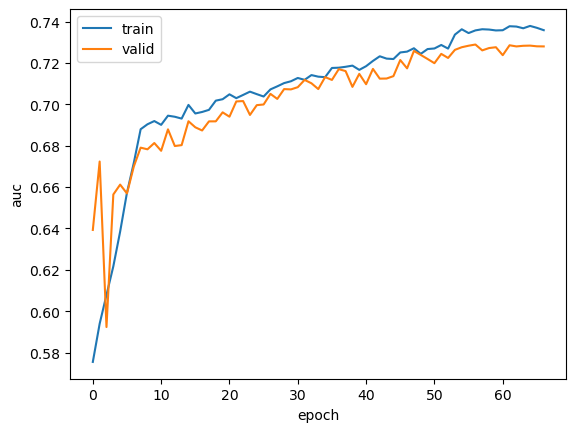

In [22]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch

sns.lineplot(data = history_df, x='epoch', y='auc', label='train')
sns.lineplot(data = history_df, x='epoch', y='val_auc', label='valid')

In [23]:
model = keras.models.load_model('model/model_reduced_pca/base_model_logloss_0.53_auc_0.73_checkpoint.h5')

In [24]:
from sklearn.metrics import auc, roc_curve, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt

In [25]:
y_pred = model.predict(X_test)
# using x test here

3691/3691 [==============================] - 5s 1ms/step


In [26]:
y_pred_keras = y_pred.ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
avg_prec_score = average_precision_score(y_test, y_pred)

In [27]:
avg_prec_score #auc-pr

0.121734546437057

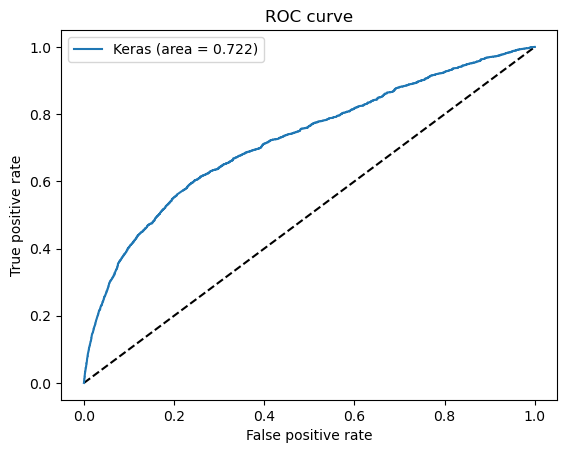

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [29]:
temp = X_test.copy()
temp['predicted'] = y_pred
temp['true'] = y_test
fraud_cases = temp[temp['true'] == 1]
non_fraud_cases = temp[temp['true']==0]

In [30]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,predicted,true
7681,-6445.123906,8.896080,-265.289256,-192.123936,150.804378,218.119765,-16.209206,-16.447674,-1.514525,45.165001,0.392765,0
570242,-4963.870529,-125.035583,164.542851,40.319896,73.218754,-21.346544,-18.812581,26.825554,-2.905725,-12.283980,0.235929,0
340470,4526.770149,-92.348557,-122.672777,64.296720,0.753739,-5.639433,-3.604536,-17.265182,1.159528,-9.649588,0.346810,0
131781,4936.731365,115.134917,-219.936819,-323.861982,61.755849,128.078308,120.753722,23.837397,7.916876,-30.269819,0.533699,0
472772,-5838.312011,-102.062680,-96.720365,67.355386,14.025935,-6.328330,-1.645200,-21.114487,0.004752,37.958910,0.392492,0


In [ ]:
# per row consider apakah dia tp, fp, fn, tn dengan bikin 4 kolom
# group by bin
# dihitung cumulative sum untuk setiap tp fp fn tn
# ini berubah seiring threshold berubah
# non-cumulative ngitung precision itu di bin itu doang (bins nya adalah populasi)
# fraud rate
# masukin y_val
# transaksi masuk, kemungkinan dia dihitung fraud berapa? -> fraud rate

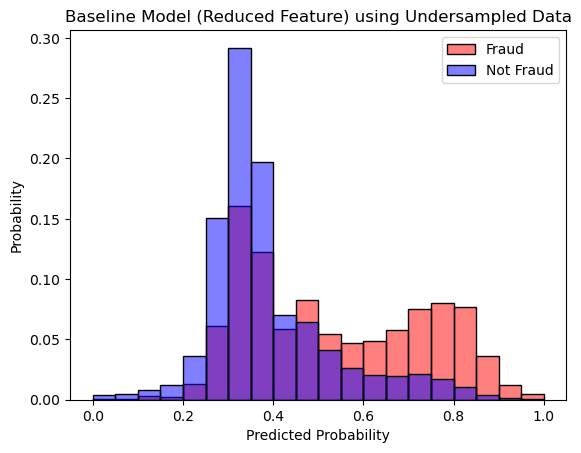

In [31]:
fig, ax = plt.subplots()
sns.histplot(data=fraud_cases, x='predicted', binwidth=0.05, binrange=[0,1], stat='probability', color='red', alpha=0.5, label='Fraud')
sns.histplot(data=non_fraud_cases, x='predicted', binwidth=0.05, binrange=[0,1], stat='probability', color='blue', alpha=0.5, label='Not Fraud')
plt.title("Baseline Model (Reduced Feature) using Undersampled Data")
plt.xlabel("Predicted Probability")
ax.legend()
plt.show()

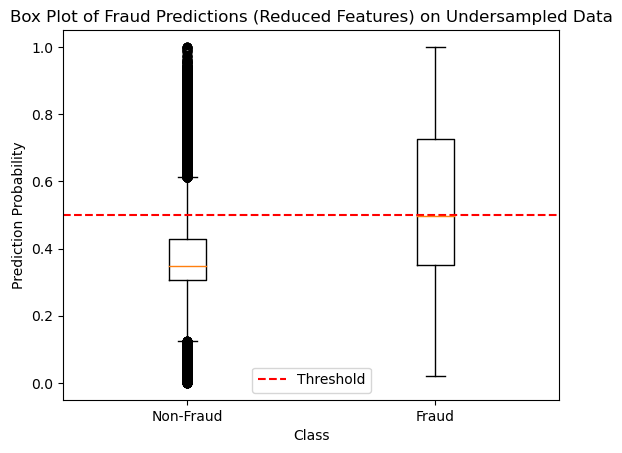

In [32]:
fraud_cases = y_pred[y_test==1]
non_fraud_cases = y_pred[y_test==0]
threshold = 0.5
plt.boxplot([non_fraud_cases.flatten(), fraud_cases.flatten()])
plt.xticks([1, 2], ['Non-Fraud', 'Fraud'])
plt.ylabel('Prediction Probability')
plt.xlabel('Class')
plt.title('Box Plot of Fraud Predictions (Reduced Features) on Undersampled Data')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

Based on this, we can decide that the threshold is 0.39. Let's calculate the confusion matrix

In [ ]:
y_pred_binary = (y_pred > 0.39).astype(int)
cm = confusion_matrix(y_val, y_pred_binary)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

[Text(0, 0.5, 'Non Fraud'), Text(0, 1.5, 'Fraud')]

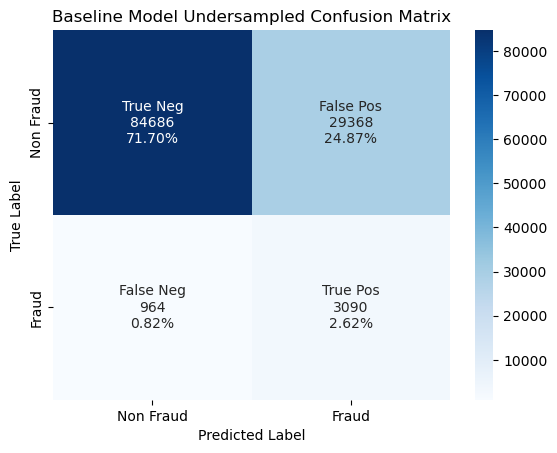

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title("Baseline Model Undersampled Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
ax.xaxis.set_ticklabels(['Non Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud', 'Fraud'])

In [ ]:
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = (2 * recall * precision) / (recall + precision)
y_pred_keras = y_pred.ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"AUC: {auc_keras}")

False Positive Rate: 0.2574920651621162
Recall: 0.7622101628021707
Precision: 0.09519995070552714
Accuracy: 0.7431842042876011
F1: 0.16925942156003507
AUC: 0.8371240352926064


In [ ]:
K.clear_session()